# To Do List

1. More analysis
2. Fix visuals - title, axes, color choices, legend
3. Background

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import os
os.chdir('C:\\Users\\nu\\Desktop\\Thinkful\\Bootcamp\\Capstone - Copy')
%matplotlib inline

In [2]:
# creates array of rows to skip in the dataset
skip = list(range(10))
skip.append(11)

# imports the files that we need
xl1 = pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx')
xl2 = pd.ExcelFile('Table_1.3_Primary_Energy_Consumption_by_Source.xlsx')
xl3 = pd.ExcelFile('Table_2.1_Energy_Consumption_by_Sector.xlsx')
annual_production = xl1.parse('Annual Data', skiprows = skip)
annual_consumption = xl2.parse('Annual Data', skiprows = skip)
sectors = xl3.parse('Annual Data', skiprows = skip)

# Total Energy Production and Consumption

(1949, 2016)

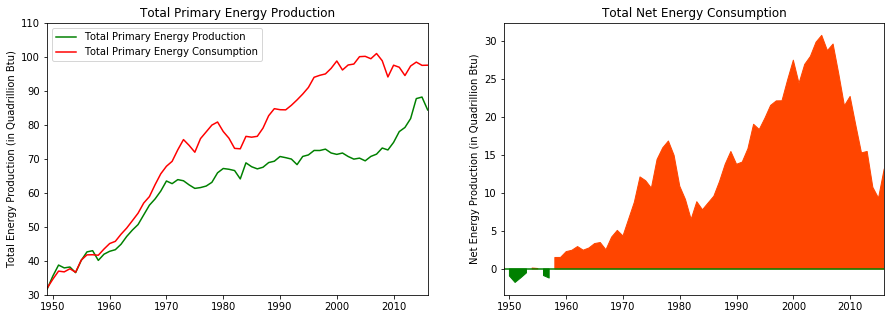

In [3]:
plt.rcParams['figure.figsize'] = [15,5]

# importing data from our sources
x = annual_production['Annual Total']
y1 = annual_production['Total Primary Energy Production']
y2 = annual_consumption['Total Primary Energy Consumption']
y3 = y2 -y1

# creating the three subplots
# try to make a fill between
plt.subplot(1,2,1)
plt.title('Total Primary Energy Production')
plt.axis([1949,2016, 30, 110])
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.plot(x, y1, color = 'green')
plt.plot(x, y2, color = 'red')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Total Net Energy Consumption')
plt.axhline(0, color='green', linestyle = '-')
plt.ylabel('Net Energy Production (in Quadrillion Btu)')
plt.fill_between(x, 0, y3, where=y3 > 0, color = 'orangered')
plt.fill_between(x, 0, y3, where=y3 < 0, color = 'green')
plt.xlim((1949, 2016))

# Focus on Sustainable Production

(1949, 2016)

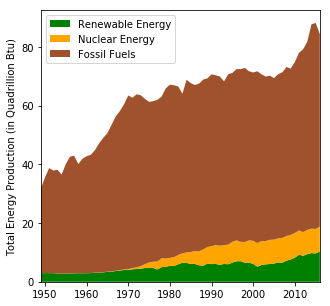

In [21]:
plt.rcParams['figure.figsize'] = [5,5]

x = annual_production['Annual Total']
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Nuclear Electric Power Production']
y3 = annual_production['Total Fossil Fuels Production']

plt.stackplot(x, y1, y2, y3, 
             colors = ['green', 'orange', 'sienna'], 
             labels = ['Renewable Energy', 'Nuclear Energy', 'Fossil Fuels'])
plt.legend(loc='upper left')
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.xlim((1949, 2016))

Text(0,0.5,'% of Renewable Energy Production')

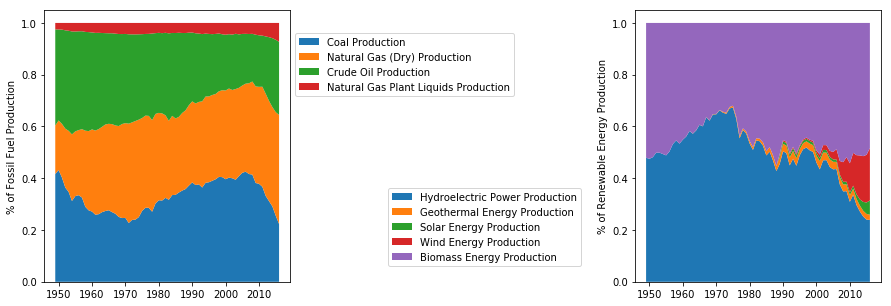

In [6]:
plt.rcParams['figure.figsize'] = [15,5]
c = annual_production.columns[:]
f = {}

# plots fossil fuels
plt.subplot(1,3,1)
for i in range(1,5):
    f[i] = annual_production[c[i]] / annual_production[c[5]]
plt.stackplot(x,
             f[1],f[2],f[3],f[4],
             labels = (c[1],c[2],c[3],c[4]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.ylabel('% of Fossil Fuel Production')

# plots renewable energy sources
plt.subplot(1,3,3)
annual_production = annual_production. replace('Not Available',0)
for i in range(7,12):
    f[i] = annual_production[c[i]] / annual_production[c[12]]
plt.stackplot(x,
             f[7],f[8],f[9],f[10],f[11],
             labels = (c[7],c[8],c[9],c[10],c[11]))
plt.legend(loc='center right', bbox_to_anchor=(-.2, 0.2))
plt.ylabel('% of Renewable Energy Production')

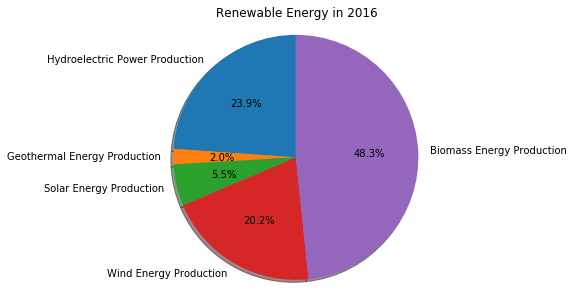

In [18]:
plt.rcParams['figure.figsize'] = [10,5]

sources = list(annual_production.iloc[-1, 7:12])
labels = list(c[7:12])

fig1, ax1 = plt.subplots()
ax1.pie(sources, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Renewable Energy in 2016')
plt.show()

Regression line: 0.000828563503025x + -1.55364774096
R-squared value: 0.853151552543


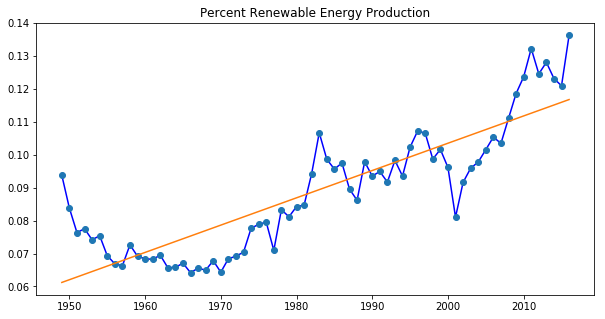

In [19]:
# constructs a best-fit line
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Total Fossil Fuels Production']
y3 = y1 / (y1 + y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y3)
line = slope*x+intercept

# creates the plot
plt.title('Percent Renewable Energy Production')
plt.plot(x, y3, color = 'blue')
plt.plot(x,y3,'o', x, line)

# return the linear regression equation and the r-squared value
print('Regression line: {}x + {}'.format(str(slope),str(intercept)))
print('R-squared value: {}'.format(str(r_value)))

# Examing Energy Consumption By Sector

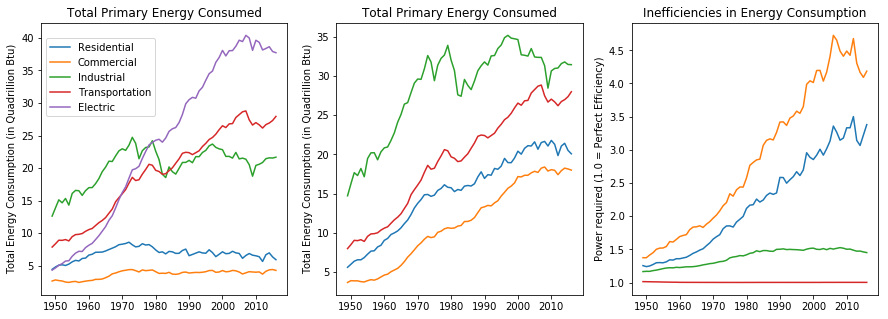

In [12]:
plt.rcParams['figure.figsize'] = [15,5]

# loading sectors into a dictionary
x = sectors['Annual Total']
d = {}
for i in range(1,10):
    d[i] = sectors.iloc[:,i]/1000
d[1].name = 'Residential'
d[3].name = 'Commercial'
d[5].name = 'Industrial'
d[7].name = 'Transportation'
d[9].name = 'Electric'

# plotting primary energy consumption
plt.subplot(1,3,1)
plt.title('Total Primary Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(1,10,2):
    plt.plot(x,d[i])
plt.legend(loc='center left', bbox_to_anchor=(0, 0.8))

# plotting total energy consumption
plt.subplot(1,3,2)
plt.title('Total Primary Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(2,9,2):
    plt.plot(x,d[i])

# plotting energy inefficiency
plt.subplot(1,3,3)
plt.title('Inefficiencies in Energy Consumption')
plt.ylabel('Power required (1.0 = Perfect Efficiency)')
e = {}
for i in range(1,5):
    e[i] = (d[2*i] - d[2*i-1]) / d[2*i-1] + 1
    plt.plot(x, e[i])